In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-cryptocurrency-2022/Top 100 Cryptocurrency 2022.csv


**İmporting Necessary Librarys**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

**Loading and Getting Know Data**

In [3]:
df = pd.read_csv("../input/top-100-cryptocurrency-2022/Top 100 Cryptocurrency 2022.csv")
df.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,"$36,983",-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,"$37,019",-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,"$36,942",-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,"$2,510",-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,"$2,494",-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH


In [4]:
df.tail()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
95,96,ECOMI,$0.01,-6.53%,4.42%,9.77%,9999.99%,$3.99 B,$4.01 M,581.91 B OMI
96,97,BITTORRENT,$0.00,$0.00,-1.10%,-19.83%,481.49%,$2.04 B,$283.87 K,932.50 B BTTOLD
97,98,SAFEMOON,$0.00,-3.19%,-3.72%,-34.03%,0.00%,$933.63 M,$410.28 K,566.50 B SFM
98,99,ECASH,$0.00,-3.71%,-1.41%,-32.83%,0.00%,$1.40 B,$19.78 M,18.97 T XEC
99,100,SHIBA INU,$0.00,-6.68%,-8.16%,-38.56%,9999.99%,$11.27 B,$443.94 M,549.15 T SHIB


In [5]:
df.columns

Index(['Ranking', 'Crypto Name', 'Price', 'Changes 24H ', 'Changes 7D ',
       'Changes 30D ', 'Changes 1Y', 'Market Cap', 'Volume 24H',
       'Available Supply'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ranking           100 non-null    int64 
 1   Crypto Name       100 non-null    object
 2   Price             100 non-null    object
 3   Changes 24H       100 non-null    object
 4   Changes 7D        100 non-null    object
 5   Changes 30D       100 non-null    object
 6   Changes 1Y        100 non-null    object
 7   Market Cap        100 non-null    object
 8   Volume 24H        100 non-null    object
 9   Available Supply  99 non-null     object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


In [7]:
df.dtypes

Ranking              int64
Crypto Name         object
Price               object
Changes 24H         object
Changes 7D          object
Changes 30D         object
Changes 1Y          object
Market Cap          object
Volume 24H          object
Available Supply    object
dtype: object

In [8]:
df.isnull().sum()

Ranking             0
Crypto Name         0
Price               0
Changes 24H         0
Changes 7D          0
Changes 30D         0
Changes 1Y          0
Market Cap          0
Volume 24H          0
Available Supply    1
dtype: int64

Fill the nan data with 0

In [9]:
df.fillna(0,inplace=True)

In [10]:
#Let's check if it's worked
df.isnull().sum()

Ranking             0
Crypto Name         0
Price               0
Changes 24H         0
Changes 7D          0
Changes 30D         0
Changes 1Y          0
Market Cap          0
Volume 24H          0
Available Supply    0
dtype: int64

In [11]:
df.head()

,Ranking,Crypto Name,Price,Changes 24H,Changes 7D,Changes 30D,Changes 1Y,Market Cap,Volume 24H,Available Supply
0,1,BITCOIN,"$36,983",-2.97%,1.96%,-20.08%,8.25%,$701.49 B,$13.01 B,18.94 M BTC
1,2,WRAPPED BITCOIN,"$37,019",-2.84%,1.84%,-20.13%,8.26%,$10.04 B,$253.14 M,271.16 K WBTC
2,3,HUOBI BTC,"$36,942",-4.24%,1.37%,-20.39%,7.82%,$1.47 B,$29.51 M,39.88 K HBTC
3,4,ETHEREUM,"$2,510",-3.64%,-1.28%,-32.04%,82.54%,$298.87 B,$10.00 B,119.38 M ETH
4,5,LIDO STAKED ETHER,"$2,494",-3.23%,-1.84%,-31.98%,95.88%,$4.48 B,$2.07 M,1.79 M STETH


Let's see, change volume of last 24 hours and  how effect on changes value of last 24 hours.

In [12]:
change_data = df[['Crypto Name','Changes 24H ','Volume 24H']]
change_data.head(10)

,Crypto Name,Changes 24H,Volume 24H
0,BITCOIN,-2.97%,$13.01 B
1,WRAPPED BITCOIN,-2.84%,$253.14 M
2,HUOBI BTC,-4.24%,$29.51 M
3,ETHEREUM,-3.64%,$10.00 B
4,LIDO STAKED ETHER,-3.23%,$2.07 M
5,MAKER,1.58%,$49.99 M
6,BINANCE COIN,-3.80%,$1.05 B
7,BITCOIN CASH,-5.84%,$1.13 B
8,KUSAMA,-8.71%,$39.97 M
9,MONERO,-7.48%,$85.93 M


As we see, all columns data types are Object. Let's change it with float

In [13]:
change_data.head()

,Crypto Name,Changes 24H,Volume 24H
0,BITCOIN,-2.97%,$13.01 B
1,WRAPPED BITCOIN,-2.84%,$253.14 M
2,HUOBI BTC,-4.24%,$29.51 M
3,ETHEREUM,-3.64%,$10.00 B
4,LIDO STAKED ETHER,-3.23%,$2.07 M


In [14]:
def objto_float(change_data):
    floats = []
    floats_V = []
    
    for changes in change_data['Changes 24H ']:
        floats.append(float(changes.replace('$','').replace('%','')))
    for changes in change_data['Volume 24H']:
        floats_V.append(changes.replace('$',''))
    
    change_data['Changes 24H '] = floats
    change_data['Volume 24H'] = floats_V
                        
    for i in range(len(change_data['Volume 24H'])):
        
        if change_data['Volume 24H'][i] is not float:  
            price_list = change_data['Volume 24H'][i].split(" ")
            price = 0
            if price_list[1]== 'B':
                price = float(price_list[0])*(10**9)
            elif price_list[1]== 'M':
                price = float(price_list[0])*(10**6)
            elif price_list[1]== 'K':
                price = float(price_list[0])*(10**3)
            change_data['Volume 24H'][i] = price
    

    return change_data
objto_float(change_data)
change_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

,Crypto Name,Changes 24H,Volume 24H
0,BITCOIN,-2.97,13010000000.0
1,WRAPPED BITCOIN,-2.84,253140000.0
2,HUOBI BTC,-4.24,29510000.0
3,ETHEREUM,-3.64,10000000000.0
4,LIDO STAKED ETHER,-3.23,2070000.0


In [18]:
change_data.dtypes

Crypto Name      object
Changes 24H     float64
Volume 24H       object
dtype: object

In [22]:
change_data["Volume 24H"]=change_data["Volume 24H"].astype("float64")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
change_data.dtypes

Crypto Name      object
Changes 24H     float64
Volume 24H      float64
dtype: object

**Let's make some visiluation**

In [25]:
change_data.head()

,Crypto Name,Changes 24H,Volume 24H
0,BITCOIN,-2.97,1.301000e+10
1,WRAPPED BITCOIN,-2.84,2.531400e+08
2,HUOBI BTC,-4.24,2.951000e+07
3,ETHEREUM,-3.64,1.000000e+10
4,LIDO STAKED ETHER,-3.23,2.070000e+06


<AxesSubplot:xlabel='Changes 24H ', ylabel='Volume 24H'>

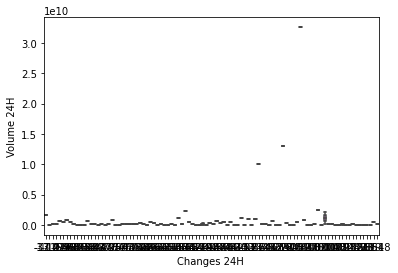

In [34]:
sns.boxplot(x = 'Changes 24H ', y = 'Volume 24H', data = change_data) 

<AxesSubplot:xlabel='Changes 24H ', ylabel='Volume 24H'>

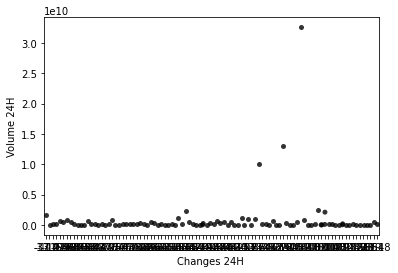

In [35]:
sns.stripplot(x = 'Changes 24H ', y = 'Volume 24H', data = change_data,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

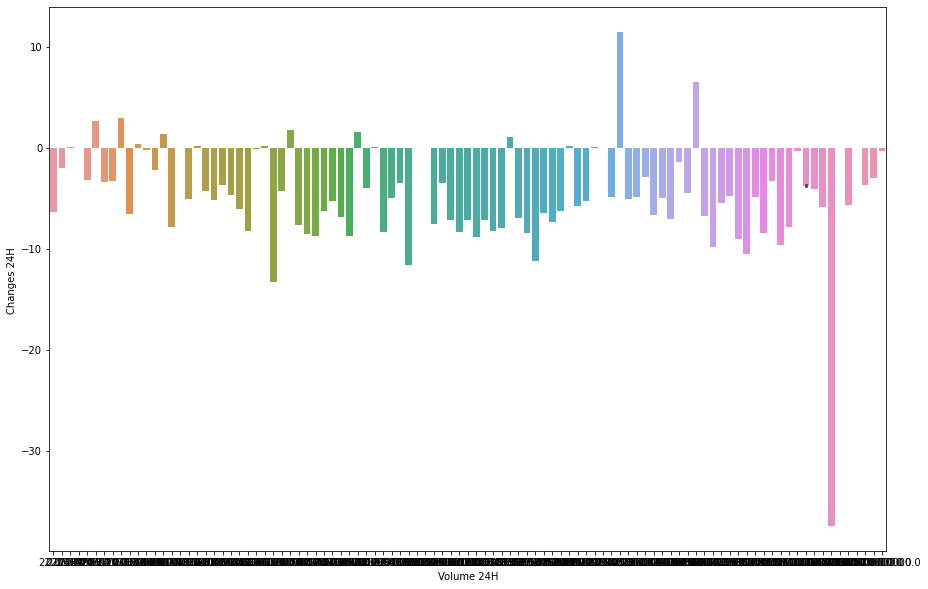

In [36]:
plt.figure(figsize=(15, 10))
sns.barplot(data=change_data, x="Volume 24H", y="Changes 24H ");

**Q&A**

In [38]:
# First let's look data
change_data.head()

,Crypto Name,Changes 24H,Volume 24H
0,BITCOIN,-2.97,1.301000e+10
1,WRAPPED BITCOIN,-2.84,2.531400e+08
2,HUOBI BTC,-4.24,2.951000e+07
3,ETHEREUM,-3.64,1.000000e+10
4,LIDO STAKED ETHER,-3.23,2.070000e+06


What is the avarage Valume 24H value  of top 20 cryptocurrency ?

In [42]:
float(round(change_data["Volume 24H"][:21].mean()))

1326696577.0

Which cryptocurrencies rose more than 5%?

In [43]:
change_data.loc[change_data["Changes 24H "] > 5]

,Crypto Name,Changes 24H,Volume 24H
31,INTERNET COMPUTER,11.48,219470000.0
43,FLOW,6.51,433790000.0


How many cryptocurrencies down more than 7.5% ?

In [44]:
change_data.loc[change_data["Changes 24H "] < -7.5 ]

,Crypto Name,Changes 24H,Volume 24H
8,KUSAMA,-8.71,3.997000e+07
11,ELROND,-8.85,9.617000e+07
14,QUANT,-8.20,2.408000e+07
15,DASH,-8.21,1.025300e+08
16,ZCASH,-7.95,1.083400e+08
18,AVALANCHE,-9.00,5.428900e+08
21,TERRA,-37.40,1.590000e+09
25,COSMOS,-9.63,7.526500e+08
26,CONVEX FINANCE,-7.83,1.010000e+07
32,POLKADOT,-8.44,6.954400e+08


Which cryptocurrencies has most 24H Volume ?

In [47]:
change_data.sort_values(by="Volume 24H", ascending=False).head()

,Crypto Name,Changes 24H,Volume 24H
71,TETHER,-0.33,3.257000e+10
0,BITCOIN,-2.97,1.301000e+10
3,ETHEREUM,-3.64,1.000000e+10
69,BINANCE USD,-0.01,2.490000e+09
77,XRP,-5.63,2.270000e+09


How many cryptocurrencies has change more than 10%(+/-) ?

In [50]:
change_data.loc[(change_data["Changes 24H "] < 10) | (change_data["Changes 24H "] < -10) ].sort_values(by="Changes 24H ")

,Crypto Name,Changes 24H,Volume 24H
21,TERRA,-37.40,1.590000e+09
44,KADENA,-13.21,2.946000e+07
39,WAVES,-11.55,7.910000e+07
52,THETA NETWORK,-11.17,1.558500e+08
56,FANTOM,-10.46,6.915000e+08
...,...,...,...
5,MAKER,1.58,4.999000e+07
38,HUOBI TOKEN,1.73,3.194000e+07
48,LEO TOKEN,2.66,4.456200e+05
54,CELSIUS NETWORK,2.99,3.170000e+06


That's all for now, we can make more questions like that. Thanks for visiting!